<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# PCA Lab: Speed Dating

_Authors: Kiefer Katovich (SF)_

---

Let's practice principal component analysis (PCA) using a data set from Kaggle. PCA is often used to simplify data, reduce noise, and find unmeasured latent variables, so it's important to take the time to understand what's going on.

**In this lab, we will:**

- Explore how PCA relates to correlation.
- Use PCA to perform dimensionality reduction.
- Predict whether or not a speed dater likes reading based on the dater's other likes.

---

### Data Set

The data set we're using for this lab is a subset of this [much more detailed speed dating data set](https://www.kaggle.com/annavictoria/speed-dating-experiment). In particular, this contains no information on the actual speed dating itself (i.e., successes with or opinions of other individuals). 

It also contains no follow-up information where individuals are asked the same questions about themselves again. It only contains information about what an individual enjoys doing, their self-ratings on how desirable they are, and how they think others rate them based on desirability.

The columns present in the data are outlined below:

FieldName|Description
---------|-----------
    subject_id                   |   Unique individual identifier.
    wave                         |   Meetup ID.
    like_sports                  |   Enjoyment of participating in sports.
    like_tvsports                |   Enjoyment of watching sports on TV.
    like_exercise                |   Enjoyment of exercise.
    like_food                    |   Enjoyment of food.
    like_museums                 |   Enjoyment of museums.
    like_art                     |   Enjoyment of art.
    like_hiking                  |   Enjoyment of hiking.
    like_gaming                  |   Enjoyment of playing games.
    like_clubbing                |   Enjoyment of going clubbing/partying.
    like_reading                 |   Enjoyment of reading.
    like_tv                      |   Enjoyment of TV in general.
    like_theater                 |   Enjoyment of the theater (plays, musicals, etc.).
    like_movies                  |   Enjoyment of movies.
    like_concerts                |   Enjoyment of concerts.
    like_music                   |   Enjoyment of music.
    like_shopping                |   Enjoyment of shopping.
    like_yoga                    |   Enjoyment of yoga.
    subjective_attractiveness    |   How attractive they rate themselves.
    subjective_sincerity         |   How sincere they rate themselves.
    subjective_intelligence      |   How intelligent they rate themselves.
    subjective_fun               |   How fun they rate themselves.
    subjective_ambition          |   How ambitious they rate themselves.
    objective_attractiveness     |   Perceived rating others would give them on how attractive they are.
    objective_sincerity          |   Perceived rating others would give them on how sincere they are.
    objective_intelligence       |   Perceived rating others would give them on how intelligent they are.
    objective_fun                |   Perceived rating others would give them on how fun they are.
    objective_ambition           |   Perceived rating others would give them on how ambitious they are.
    
There are 551 subjects total.

---

### 1) Load packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

sns.set_style("whitegrid")

---

### 2) Load and clean the speed dating data.

- First, remove columns with more than 200 missing values.
- Then, remove rows with missing values.
- Verify that no rows contain NaNs.

In [2]:
sd = pd.read_csv('./datasets/speed_dating.csv')
sd.head()

,subject_id,wave,like_sports,like_tvsports,like_exercise,like_food,like_museums,like_art,like_hiking,like_gaming,...,subjective_attractiveness,subjective_sincerity,subjective_intelligence,subjective_fun,subjective_ambition,objective_attractiveness,objective_sincerity,objective_intelligence,objective_fun,objective_ambition
0,1,1,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,...,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
1,2,1,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,...,7.0,5.0,8.0,10.0,3.0,NaN,NaN,NaN,NaN,NaN
2,3,1,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,...,8.0,9.0,9.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN
3,4,1,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,...,7.0,8.0,7.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN
4,5,1,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,...,6.0,3.0,10.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN


In [3]:
sd.describe()

,subject_id,wave,like_sports,like_tvsports,like_exercise,like_food,like_museums,like_art,like_hiking,like_gaming,...,subjective_attractiveness,subjective_sincerity,subjective_intelligence,subjective_fun,subjective_ambition,objective_attractiveness,objective_sincerity,objective_intelligence,objective_fun,objective_ambition
count,551.000000,551.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,...,542.000000,542.000000,542.000000,542.000000,542.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,276.787659,11.083485,6.395221,4.549632,6.286765,7.775735,6.972426,6.689338,5.757353,3.840074,...,7.092251,8.285978,8.385609,7.701107,7.577491,6.929936,7.933121,8.257962,7.385350,7.601911
std,159.494486,6.013947,2.630753,2.801164,2.449965,1.778032,2.059245,2.273435,2.566239,2.610746,...,1.390081,1.412038,1.089700,1.547510,1.786293,1.506597,1.643649,1.330528,1.796671,1.822156
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,3.000000,2.000000,1.000000
25%,139.500000,6.000000,4.000000,2.000000,5.000000,7.000000,6.000000,5.000000,4.000000,1.000000,...,6.000000,8.000000,8.000000,7.000000,7.000000,6.000000,7.000000,8.000000,6.000000,7.000000
50%,277.000000,11.000000,7.000000,4.000000,7.000000,8.000000,7.000000,7.000000,6.000000,3.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000
75%,414.500000,15.000000,8.250000,7.000000,8.000000,9.000000,8.250000,8.000000,8.000000,6.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,9.000000,9.000000
max,552.000000,21.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,14.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [4]:
sd.isnull().sum()

subject_id                     0
wave                           0
like_sports                    7
like_tvsports                  7
like_exercise                  7
like_food                      7
like_museums                   7
like_art                       7
like_hiking                    7
like_gaming                    7
like_clubbing                  7
like_reading                   7
like_tv                        7
like_theater                   7
like_movies                    7
like_concerts                  7
like_music                     7
like_shopping                  7
like_yoga                      7
subjective_attractiveness      9
subjective_sincerity           9
subjective_intelligence        9
subjective_fun                 9
subjective_ambition            9
objective_attractiveness     237
objective_sincerity          237
objective_intelligence       237
objective_fun                237
objective_ambition           237
dtype: int64

In [5]:
miss_200 = list(sd.isnull().sum()[sd.isnull().sum() > 200].index)
miss_200

['objective_attractiveness',
 'objective_sincerity',
 'objective_intelligence',
 'objective_fun',
 'objective_ambition']

In [6]:
# Remove columns with more than 200 missing values.
sd = sd.drop(columns=miss_200)
sd.isnull().sum()

subject_id                   0
wave                         0
like_sports                  7
like_tvsports                7
like_exercise                7
like_food                    7
like_museums                 7
like_art                     7
like_hiking                  7
like_gaming                  7
like_clubbing                7
like_reading                 7
like_tv                      7
like_theater                 7
like_movies                  7
like_concerts                7
like_music                   7
like_shopping                7
like_yoga                    7
subjective_attractiveness    9
subjective_sincerity         9
subjective_intelligence      9
subjective_fun               9
subjective_ambition          9
dtype: int64

In [7]:
# Then, remove rows with missing values.
# Verify that no rows contain NaNs.
sd = sd.dropna()
sd.isnull().sum()[sd.isnull().sum() != 0]

Series([], dtype: int64)

In [8]:
sd.shape

(542, 24)

---

### 3) Example: Are the `subjective` columns correlated?

Here, we'll understand how the `subjective` columns are correlated.

- Find the z scores of each `subjective` column (i.e. standardize the `subjective` columns).
- Visualize correlation using [PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html).
- Visualize correlation using a heat map.

**3.A) Find the z scores of each column. This allows the columns to more easily be directly compared.**

In [9]:
subjective_cols = [col for col in sd.columns \
                   if col.startswith('subjective')]
# A:
subjective_cols

['subjective_attractiveness',
 'subjective_sincerity',
 'subjective_intelligence',
 'subjective_fun',
 'subjective_ambition']

In [10]:
subjective = sd[subjective_cols]
subjective.head()

,subjective_attractiveness,subjective_sincerity,subjective_intelligence,subjective_fun,subjective_ambition
0,6.0,8.0,8.0,8.0,7.0
1,7.0,5.0,8.0,10.0,3.0
2,8.0,9.0,9.0,8.0,8.0
3,7.0,8.0,7.0,9.0,8.0
4,6.0,3.0,10.0,6.0,8.0


In [11]:
# Instantiate
sc = StandardScaler()
subjective_scaled = sc.fit_transform(subjective)

In [12]:
# Numpy array
# subjective_scaled

In [13]:
# Z-score dataframe
subjective_scaled_df = pd.DataFrame(subjective_scaled,
                                    columns=subjective.columns)

# Check mean and std
subjective_scaled_df.describe().T[['mean','std']]

,mean,std
subjective_attractiveness,-2.208156e-16,1.000924
subjective_sincerity,1.390851e-16,1.000924
subjective_intelligence,-4.629343e-16,1.000924
subjective_fun,3.728055e-17,1.000924
subjective_ambition,2.285994e-16,1.000924


**3.B) Use a PairGrid to visualize correlation.**

[`PairGrid`](https://seaborn.pydata.org/generated/seaborn.PairGrid.html) is more general version of `pairplot`.  For example, you could use the following code, where `subjective` is a data frame containing only the subjective columns:

```python
g = sns.PairGrid(subjective)
# Regression plots in lower triangle
g = g.map_lower(sns.regplot) 
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)  # KDE plots in upper triangle
g = g.map_diag(plt.hist) # Histograms along diagonal

plt.show()
```

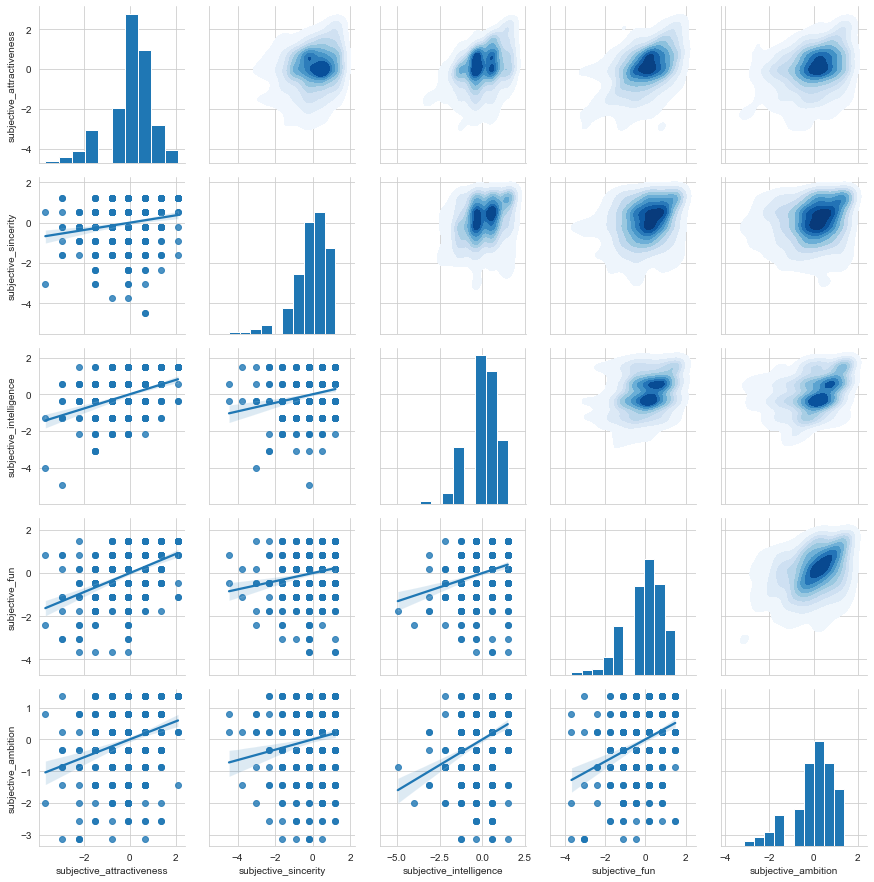

In [14]:
# A:
g = sns.PairGrid(subjective_scaled_df)
# Regression plots in lower triangle
g = g.map_lower(sns.regplot) 
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, thresh=0.05)  # KDE plots in upper triangle
g = g.map_diag(plt.hist) # Histograms along diagonal

plt.show();

**3.C) Use a heat map to visualize correlation.**

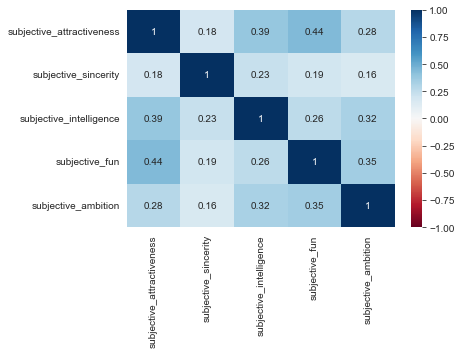

In [15]:
# A:
sns.heatmap(subjective_scaled_df.corr(),
            annot=True,
            vmin=-1,
            vmax=1,
            cmap='RdBu');

---

**Important: Did you ensure the results make sense intuitively?** If not, look at the results again. You should **always** interpret your results and ensure they make sense based on what you expected. If they don’t, investigate why — sometimes your analysis or data are wrong.

> For example, the results show that believing you are attractive and fun are correlated. Would you expect that believing you are intellectual and fun to have a higher or lower correlation? What do the results say?

---


### 4) Visualize some preference columns.

Next, we’ll explore how some preference ratings are correlated. You saw an example — now try it on the `preference_cols` below.

- Find the z scores of each column in `preference_cols`.
- Visualize correlation using PairGrid.
- Visualize correlation using a heat map.
- Do these results make sense intuitively? 

In [16]:
preference_cols = ['like_tvsports', 'like_sports', 'like_museums', 
                   'like_theater', 'like_shopping']
sd_like = sd[preference_cols]

**4.A) Find the z scores of each column in `preference_cols`.**

In [17]:
# A:
# Instantiate
sc = StandardScaler()
sd_like_scaled = sc.fit_transform(sd_like)

# Create data frame for sd_like_scaled
sd_like_scaled_df = pd.DataFrame(sd_like_scaled,
                                 columns=preference_cols)
sd_like_scaled_df.head()

,like_tvsports,like_sports,like_museums,like_theater,like_shopping
0,-0.912780,0.992539,-2.935051,-2.560869,0.913254
1,-0.912780,-1.291776,0.497620,0.985579,-1.000836
2,1.230441,-1.291776,-0.973525,0.098967,0.913254
3,-1.269983,-2.053215,-0.483143,0.985579,-1.766472
4,-0.198373,0.231101,-0.483143,-0.344339,0.913254


**4.B) Visualize correlation using PairGrid.**

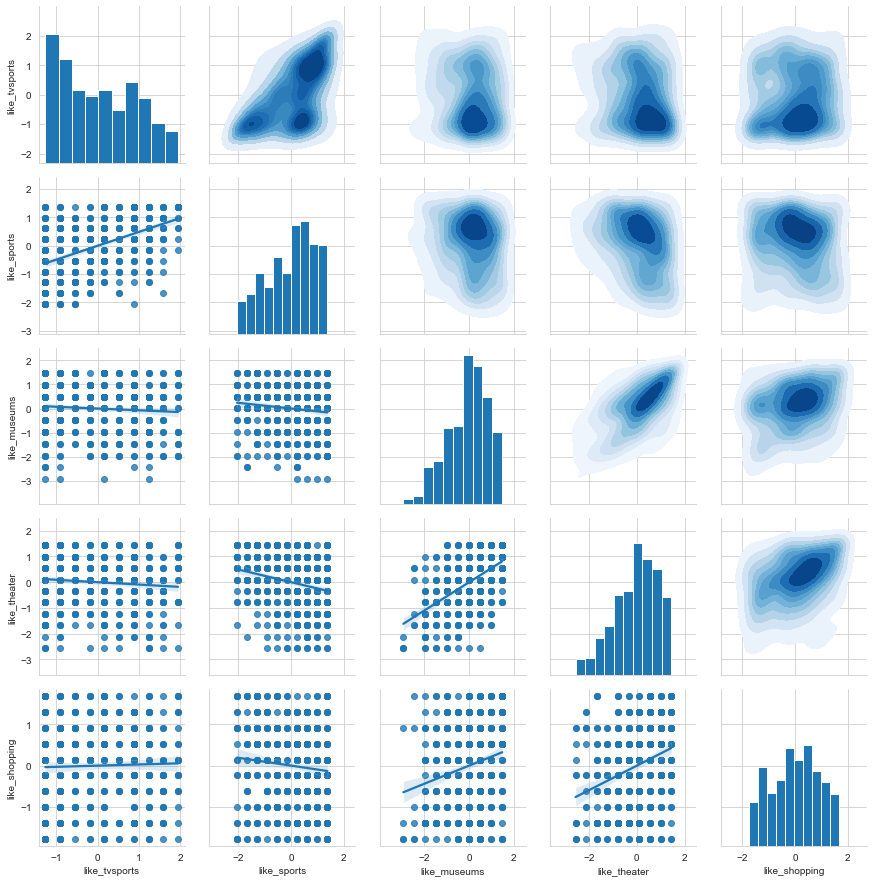

In [18]:
# A:
g = sns.PairGrid(sd_like_scaled_df)
# Regression plots in lower triangle
g = g.map_lower(sns.regplot) 
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, thresh=0.05)  # KDE plots in upper triangle
g = g.map_diag(plt.hist) # Histograms along diagonal

plt.show();

**4.C) Visualize correlation using a heat map.**

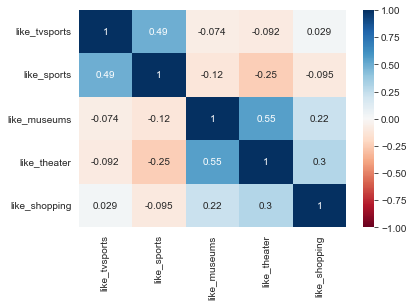

In [19]:
# A:
sns.heatmap(sd_like_scaled_df.corr(),
            annot=True,
            vmin=-1,
            vmax=1,
            cmap='RdBu');

---

### 5) Example: Fit PCA on the subjective ratings.

In [20]:
subjective_scaled_df.values[:5,:]

array([[-0.78647228, -0.20271555, -0.35419405,  0.19332293, -0.32358876],
       [-0.06642502, -2.32926706, -0.35419405,  1.48691586, -2.564932  ],
       [ 0.65362224,  0.50613495,  0.56433788,  0.19332293,  0.23674705],
       [-0.06642502, -0.20271555, -1.27272598,  0.84011939,  0.23674705],
       [-0.78647228, -3.74696807,  1.48286981, -1.10027   ,  0.23674705]])

In [21]:
subjective_pca = PCA(n_components=5)
subjective_pca.fit(subjective_scaled_df)

PCA(n_components=5)

---

**5.A) Look at the weights of the principal components.**

The principal components (or eigenvectors!) are simply the weights or coefficients on the original variables $X$ that transforms them to $Z$.

In [22]:
# A:
# .components_ provide numpy array which each row is weight for each pca axis.
# Required to transpose and store in dataframe 
weight_pca = pd.DataFrame(subjective_pca.components_.T,columns=subjective_pca.get_feature_names_out())

# Rename columns to weight of principle component for each principle component axis
weight_pca.columns = ['w_pc0', 'w_pc1', 'w_pc2', 'w_pc3', 'w_pc4']
weight_pca

,w_pc0,w_pc1,w_pc2,w_pc3,w_pc4
0,-0.501894,0.218260,-0.402024,0.348119,-0.646263
1,-0.315290,-0.909060,-0.144386,-0.213776,-0.087491
2,-0.467071,-0.097690,0.422893,0.648420,0.415949
3,-0.483864,0.274010,-0.481414,-0.361047,0.573306
4,-0.443187,0.203342,0.637912,-0.531328,-0.270179


In [23]:
subjective_scaled_df.head()

,subjective_attractiveness,subjective_sincerity,subjective_intelligence,subjective_fun,subjective_ambition
0,-0.786472,-0.202716,-0.354194,0.193323,-0.323589
1,-0.066425,-2.329267,-0.354194,1.486916,-2.564932
2,0.653622,0.506135,0.564338,0.193323,0.236747
3,-0.066425,-0.202716,-1.272726,0.840119,0.236747
4,-0.786472,-3.746968,1.482870,-1.100270,0.236747


---

**5.B) Look at the explained variance values (aka eigenvalues) and the explained variance ratios.**

The eigenvalues are ordered such that the first components have the largest eigenvalues. The values and their normalized equivalent in the explained variance ratio attribute tell you how much of the variance in the original data is encapsulated in the new component variables.

In [24]:
# A:
# explain_variance
subjective_pca.explained_variance_

array([2.16041482, 0.88925024, 0.73820887, 0.72229813, 0.49907009])

In [25]:
# A:
# explain_variance_ratio
subjective_pca.explained_variance_ratio_

array([0.43128576, 0.17752191, 0.14736937, 0.14419309, 0.09962986])

---

**5.C) Transform the subjective data into the principal component space.**

The `transform()` function in the PCA will create your new component variable matrix.

In [26]:
# A:
Z_subjective = subjective_pca.transform(subjective_scaled_df)
Z_subjective[:5,:]

array([[ 0.673942  ,  0.03439955, -0.10382612, -0.35798348,  0.57693667],
       [ 1.35044583,  2.02341707, -2.13879048,  1.07112465,  1.64483811],
       [-0.94967947, -0.27146457, -0.03924025,  0.28967741, -0.18508884],
       [ 0.18027926,  0.57245653, -0.73567524, -1.23416221, -0.05104433],
       [ 1.31095851,  2.8363581 ,  2.16499567,  1.76020932,  0.75813709]])

In [27]:
# Numpy array version
# subjective_scaled dimension: 542x5
# subjective_pca.components_.T dimension: 5x5
# Dot product result: 542x5
np.dot(subjective_scaled,subjective_pca.components_.T)[:5,:]

array([[ 0.673942  ,  0.03439955, -0.10382612, -0.35798348,  0.57693667],
       [ 1.35044583,  2.02341707, -2.13879048,  1.07112465,  1.64483811],
       [-0.94967947, -0.27146457, -0.03924025,  0.28967741, -0.18508884],
       [ 0.18027926,  0.57245653, -0.73567524, -1.23416221, -0.05104433],
       [ 1.31095851,  2.8363581 ,  2.16499567,  1.76020932,  0.75813709]])

This transformed our five-dimensional data set into vectors along its five principal components (with zero loss).
- Using these, we can now reduce the dimensionality of our data while minimizing loss.
- For example, taking only the first three eigenvectors accounts for `0.431 + 0.178 + 0.147 = 75.6%` of the variance.

In [28]:
# A:
# Cumulative explain variance ratio
explain_variance = pd.DataFrame(subjective_pca.explained_variance_ratio_,
                                index=subjective_pca.get_feature_names_out(),
                                columns=['explain_variance'])
explain_variance['cumulative_explain_variance'] = np.cumsum(subjective_pca.explained_variance_ratio_)
explain_variance

,explain_variance,cumulative_explain_variance
pca0,0.431286,0.431286
pca1,0.177522,0.608808
pca2,0.147369,0.756177
pca3,0.144193,0.900370
pca4,0.099630,1.000000


---

**5.D) PCA-transformed features are not correlated.**

- Keep in mind that each column in the transformed data is no longer correlated.
- Compare this to the exploration above where many columns were correlated.

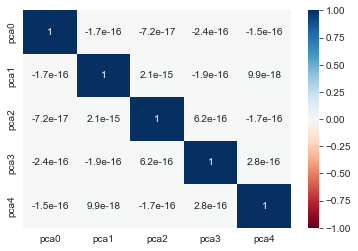

In [29]:
# A:
# Convert Z numpy array to dataframe
Z_subjective_df = pd.DataFrame(Z_subjective,
                               columns=subjective_pca.get_feature_names_out())

# Using seaborn heatmap for exploring the correlation
sns.heatmap(Z_subjective_df.corr(),
            annot=True,
            vmin=-1,
            vmax=1,
            cmap='RdBu');

# All correlation between predictor in principle component
# axis is basically zero.

---

### 6) Optional: How were the data transformed?

To demonstrate how the new principal component matrix is created from the original variable columns and the eigenvector weighting matrix, we'll create the first component (PC1) manually.

**6.A) Pull out the eigenvector for PC1.**

In [30]:
# A:
# PC1 is basically pca0 in Scikit
weight_pca[['w_pc0']]

,w_pc0
0,-0.501894
1,-0.315290
2,-0.467071
3,-0.483864
4,-0.443187


**6.B) Create a DataFrame showing the original values for the subjective variables for `person1`.**

In [31]:
# A:
# Scaled subjective variables for person1
subjective_person1 = subjective_scaled_df.loc[[0]]
subjective_person1

,subjective_attractiveness,subjective_sincerity,subjective_intelligence,subjective_fun,subjective_ambition
0,-0.786472,-0.202716,-0.354194,0.193323,-0.323589


**6.C) Add the eigenvector for PC1: the weights by which to multiply each original variable.**

Recall that each component is a linear combination of the original variables, multiplied by a "weight" defined in the eigenvector of that component.

In [32]:
weight_pca['w_pc0']

0   -0.501894
1   -0.315290
2   -0.467071
3   -0.483864
4   -0.443187
Name: w_pc0, dtype: float64

In [33]:
# A:
subjective_person1_T = subjective_person1.T
subjective_person1_T.columns = ['X']
subjective_person1_T['weight'] = list(weight_pca['w_pc0'])
subjective_person1_T

,X,weight
subjective_attractiveness,-0.786472,-0.501894
subjective_sincerity,-0.202716,-0.315290
subjective_intelligence,-0.354194,-0.467071
subjective_fun,0.193323,-0.483864
subjective_ambition,-0.323589,-0.443187


**6.D) Multiply the original variable values by the eigenvector values.**

These are the "pieces" of PC1 that will be added together to create the new value for that person.

In [34]:
# A:
subjective_person1_T['weight*X'] = subjective_person1_T['X']*subjective_person1_T['weight']
subjective_person1_T

,X,weight,weight*X
subjective_attractiveness,-0.786472,-0.501894,0.394726
subjective_sincerity,-0.202716,-0.315290,0.063914
subjective_intelligence,-0.354194,-0.467071,0.165434
subjective_fun,0.193323,-0.483864,-0.093542
subjective_ambition,-0.323589,-0.443187,0.143410


**6.E) Sum the original values multiplied by the eigenvector weights to get `person1`’s value for PC1.**

In [35]:
# A:
# PC1 (pca0 axis)
subjective_person1_T['weight*X'].sum()

0.6739420008503669

In [36]:
# Compare to Z calculated from scikit learn
Z_subjective_df.loc[[0]]

# pca0 calculated from scikit is equal to pc0 that we calculated manually.

,pca0,pca1,pca2,pca3,pca4
0,0.673942,0.0344,-0.103826,-0.357983,0.576937


In [37]:
# Numpy version
# subjective_scaled dimension: 1x5
# subjective_pca.components_.T dimension: 5x5
# Dot product result: 1x5
np.dot(subjective_scaled[0,:],subjective_pca.components_.T)

array([ 0.673942  ,  0.03439955, -0.10382612, -0.35798348,  0.57693667])

---

### 7) Fit PCA on the preference data.

Now that you've seen how it's done, try it yourself!

- Find PCA eigenvalues and eigenvectors for the five `sd_like` columns.
- Transform the original `sd_like` columns into the principal component space.
- Verify that these columns are uncorrelated.

In [38]:
# A:
# Instantiate PCA for sc_like column
sd_like_pca = PCA()

#### 7.A) Find PCA eigenvalues and eigenvectors for the five `sd_like` columns.

In [39]:
# A:
sd_like_pca.fit(sd_like_scaled_df)

PCA()

In [40]:
# eigenvalues (explain variance)
sd_like_pca.explained_variance_

array([1.9118142 , 1.34365795, 0.82318062, 0.52097299, 0.40961638])

In [41]:
# eigenvector (weight)
sd_like_pca.components_

array([[ 3.20753112e-01,  4.30670129e-01, -5.13289220e-01,
        -5.73131676e-01, -3.45969565e-01],
       [ 6.49921628e-01,  5.32191987e-01,  3.24132297e-01,
         2.65063681e-01,  3.45040672e-01],
       [ 2.08050622e-05, -1.60309917e-01, -4.54907251e-01,
        -2.24216382e-01,  8.46809977e-01],
       [ 6.22451715e-01, -5.87488681e-01, -3.38227940e-01,
         3.33354423e-01, -2.04664607e-01],
       [ 2.95420347e-01, -4.00565486e-01,  5.56896475e-01,
        -6.63221810e-01,  4.77206044e-02]])

#### 7.B) Transform the original `sd_like` columns into the principal component space.

In [42]:
# A:
# Transform the scaled sd_like
Z_sd_like = sd_like_pca.transform(sd_like_scaled_df)

# Store the Z_sd_like in dataframe
# Using for exploring the correlation between value in
# principle component axis.
Z_sd_like_df = pd.DataFrame(Z_sd_like,
                            columns= sd_like_pca.get_feature_names_out())
Z_sd_like_df.head()

,pca0,pca1,pca2,pca3,pca4
0,2.792967,-1.380042,2.523584,-1.199139,-0.559745
1,-1.323137,-1.203502,-1.087806,0.555816,-0.176508
2,-0.034641,0.138008,1.401136,1.700147,0.316730
3,-0.997338,-2.422960,-1.167939,1.269231,-0.559747
4,0.165285,0.061299,1.033292,-0.397532,-0.148281


#### 7.C) Verify that these columns are uncorrelated.

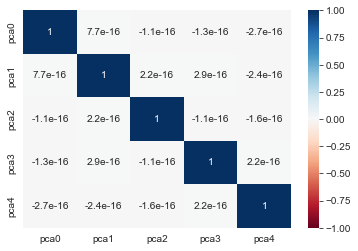

In [43]:
# A:
# Using seaborn heatmap for exploring the correlation
sns.heatmap(Z_sd_like_df.corr(),
            annot=True,
            vmin=-1,
            vmax=1,
            cmap='RdBu');

# All correlation between predictor in principle component
# axis is basically zero.

---

### 8) Use PCA for dimensionality reduction.

Using linear regression, let's predict whether or not a user likes reading.

**The key question:** Can we get the same prediction accuracy using only the first three principal components as features versus using all five original values as features?

In [44]:
reading = sd['like_reading']

**8.A) Linear regression cross-validated on original variables (`sd_like.values`).**

- What is the mean cross-validation score?
- Keep in mind that linear regression uses $R^2$ for score, so one is the ideal score.

In [45]:
def cross_val_result(X,y):
    # cross-validation score
    cross_val = cross_val_score(LinearRegression(),X, y)
    print(f'Cross-validation score: {cross_val.round(4)}')
    print(f'Mean cross-validation score: {round(cross_val.mean(),4)}') 

In [46]:
# A:
X = sd_like
y = reading

# Cross-validation
cross_val_result(X,y)

Cross-validation score: [-0.0045  0.1317  0.0224  0.1793  0.1308]
Mean cross-validation score: 0.0919


**8.B) Linear regression on the first principal component.**

- What is the mean cross-validation score?

In [47]:
# Dataframe which stored the principal component
Z_sd_like_df.head()

,pca0,pca1,pca2,pca3,pca4
0,2.792967,-1.380042,2.523584,-1.199139,-0.559745
1,-1.323137,-1.203502,-1.087806,0.555816,-0.176508
2,-0.034641,0.138008,1.401136,1.700147,0.316730
3,-0.997338,-2.422960,-1.167939,1.269231,-0.559747
4,0.165285,0.061299,1.033292,-0.397532,-0.148281


In [48]:
# A:
# Using only first principle component
X = Z_sd_like_df[['pca0']]
y = reading

# Cross-validation
cross_val_result(X,y)

Cross-validation score: [-0.0024  0.1257 -0.0454  0.1028  0.0864]
Mean cross-validation score: 0.0534


**8.C) Linear regression on first three principal components.**

- What is the mean cross-validation score?

In [49]:
# A:
# Using first three principle component
X = Z_sd_like_df[['pca0', 'pca1', 'pca2']]
y = reading

# Cross-validation
cross_val_result(X,y)

Cross-validation score: [-0.0341  0.1316  0.0495  0.1911  0.125 ]
Mean cross-validation score: 0.0926


---

**Check yourself**. The mean cross-validation score should be nearly the same for the first three principal components as it was on the original five-component data.

In [50]:
# The mean cross-validation score of the original five component equals to 0.0919.
# The mean cross-validation score of first three principle component equals to 0.0926.
# The score is nearly the same.